**Abstract**  
Companies spend a lot of money to conduct research about different customer personalities. The results of these research are then used as basis for capital allocation, marketing campaigns, and could even determine the success or failure of a product. As such, it is essential that the results of these research are as accurate as possible. To this end, customer personality analysis was conducted on a sample dataset found on both Jojie and Kaggle to extract valuable insights that can be used as basis for decision-making. This dataset is comprised of a total of 2240 entries each representing a customer and 29 features each describing either a customer's profile, purchases made, marketing campaign participation, or purchasing channel used. This analysis involves Exploratory Data Analysis (EDA) in its entirety starting from data collection and exploration up until multivariate analysis to determine relationships between different features, which are supported by visualizations and appropriate statistical treatments. The results of the analysis conducted indicate that customers income level and family status affect both product purchases and response to marketing efforts. To elaborate, high-income, store-focused customers align with campaigns promoting premium products, while parents who are more price-conscious engage better with online promotions and discounts. Although the analysis yielded valuable insights in terms of attributing certain customer characteristics to behavior, more valuable insights could have been extracted if only data pertaining to the price of products as well as specific details as to what each of the marketing campiagns offered were made available in the dataset. These missing information limited the potential impact of the analysis conducted.

**Problem Statement**  
One of the main challenges for businesses is determining customer product preferences, what marketing campaigns are effective, and what channels customers prefer to buy from. Having the answers to the aforementioned questions empowers businesses to make strategic decisions that match the target demographics. Obtaining these answers entails the collection and analysis of historical customer data that aim to tie certain customer behavior and characteristics to product purchases. With that said, the goal of this particular analysis is to understand the association and difference between customer behavior, item groups, and promotional campaigns to name a few. This was achieved by conducting Exploratory Data Analysis (EDA), which includes the descriptive analysis of historical customer data.

**Motivation**  
The next question that needs to be answered is what exactly do companies stand to gain from conducting customer personality analysis. There are multiple clear benefits that can be obtained if the customer personality analysis is done correctly, which are the following:
- Optimized budget allocation for future marketing campaigns and product releases.
- Increased profits should proper product prioritization be done based on the results of the analysis
- Increased retention and possibly frequency of purchases

**Data Source**  
The data used for the customer personality analysis was collected from the ‘marketing_campaign.csv’ file included in the public datasets folder found in Jojie. The dataset can also be found in Kaggle, which was attributed to Dr. Omar Romero-Hernandez, a professor from the Haas School of Business at U.C. Berkeley. However, upon further research, it was found that the dataset was actually not collected by the said professor, but was used only as teaching material for customer segmentation. Unfortunately, information as to where, when, and how the data was collected is not available in Kaggle nor in any other web resource. Only inferences based on the nature of the dataset can be made such as the company described in the dataset being an omni-channel retail company. Nevertheless, the findings of this analysis would still be useful as reference for companies of a similar nature.

Sources: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
https://haas.berkeley.edu/faculty/romerohernandez-omar/

**Specific Research Objectives:**  
- Step 1: Customer Segmentation and Behavior Analysis
- Step 2: Grocery Item Analysis
- Step 3: Campaign Performance Analysis
- Step 4: Integrated Relationship Analysis

**Methodology**  
Exploratory Data Analysis (EDA) is an iterative methodology used to understand a dataset's primary characteristics, uncover patterns, spot anomalies, and validate initial assumptions. For the purposes of the customer personality analysis, EDA was conducted using Python and modules such as pandas, seaborn, numpy, sqlite3, matplotlib, and plotly to generate visualizations and apply the appropriate statistical tools. The process starts with data collection and exploration, where the dataset is loaded from its source and basic analysis is conducted on the raw data. This basic analysis includes steps such as, determining the size of the dataset (number of rows and columns), determining the datatypes of each column, identifying the presence of null values, determining the unique categories of categorical columns, summary statistics (mean, count, maximum, minimum, etc.), and previewing a couple of rows from the dataset. In this analysis, the data was also collated into an SQLite database for accessibility purposes outside of Jojie before data exploration was done.

Following this exploration, the critical phase of data cleaning begins. This involves handling missing values discovered during data exploration, which requires identifying their extent and then deciding whether to remove the affected rows or columns, or to impute using a measure like the mean, median, or mode. If the number of rows with empty values is sufficiently few, the removal of these rows or columns is usually justified. This stage also includes identifying and removing duplicate records, correcting data entry errors, and standardizing categorical data. Standardizing categorical data may also entail feature engineering of some columns to improve interpretability. An example of this would be extracting the age of the customers based on their birth date or simplifying marital status to either alone or together with someone, which were some of the feature engineering done in the dataset later on. Outliers are also identified and assessed to determine if they should be kept, transformed, or removed. This is done to avoid extreme values from having too much influence on the rest of the data.

Once the data is clean, the analysis proceeds with univariate analysis, which focuses on understanding each variable individually. For numerical variables, this involves calculating descriptive statistics like central tendency (mean, median) and dispersion (standard deviation, range), which are often visualized using histograms to see the data's distribution and box plots to identify quartiles and outliers. For categorical variables, the focus is on frequency counts, visualized with bar charts or pie charts to show the proportion of each category. Afterwards, the methodology moves to bivariate and multivariate analysis to uncover relationships between variables. This involves using specific techniques based on the variable types: pair plots and correlation coefficients are used to determine relationships between numerical variables and grouped box plots for comparisons between numerical and categorical variables. A comprehensive way to visualize and quantify linear relationships between all numerical variables at once is through a correlation matrix illustrated as a heatmap. Categorical variables can also be included in a correlation matrix. However, this would entail expressing these columns numerically, which is typically done through either label encoding, ordinal encoding, or one-hot encoding. The entire EDA process concludes with a summarization of all key findings, documentation of insights, and the identification of next steps or hypotheses based on these findings.

## Import Libraries

In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
import sqlite3
from matplotlib.colors import ListedColormap
from matplotlib import colors
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# import plotly.io as pio
# pio.renderers.default = 'vscode'
import plotly.io as pio
pio.renderers.default = 'notebook'

## Create Database

In [ ]:
data = pd.read_csv('/mnt/data/public/customer-personality-analysis/marketing_campaign.csv', sep='\t')
print(data.info())
print(f"DataFrame Shape: {data.shape}")
data

In [ ]:
conn = sqlite3.connect('Lab1.db')
data.to_sql('Customer_Personality_Analysis', conn, if_exists='replace', index=False)
conn.commit()
conn.close()

In [42]:
conn = sqlite3.connect('Lab1.db')
table = pd.read_sql(
    'SELECT * FROM Customer_Personality_Analysis',
    conn
    )  # Test to see if the table is in the database
table

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [43]:
conn.close()

## Data Exploration

In [44]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The dataset is comprised of 2240 entries (customers) with a total of 29 columns (features).
The following are the appropriate feature groups and corresponding features pertaining to different characteristics of a customer, but nevertheless describe each customer descriptively based on customer profile, product purchases, marketing campaign participation, and product purchase channnel used:

**Customer Profile**
- ID: Customer's unique identifier (integer)
- Year_Birth: Customer's birth year (integer)
- Education: Customer's education level (string)
- Marital_Status: Customer's marital status (string)
- Income: Customer's yearly household income (float)
- Kidhome: Number of children in customer's household (integer)
- Teenhome: Number of teenagers in customer's household (integer)
- Dt_Customer: Date of customer's enrollment with the company (datetime)
- Recency: Number of days since customer's last purchase (integer)
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise (integer)

**Product Purchases**
- MntWines: Amount spent on wine in last 2 years (integer)
- MntFruits: Amount spent on fruits in last 2 years (integer)
- MntMeatProducts: Amount spent on meat in last 2 years (integer)
- MntFishProducts: Amount spent on fish in last 2 years (integer)
- MntSweetProducts: Amount spent on sweets in last 2 years (integer)
- MntGoldProds: Amount spent on gold in last 2 years (integer)

**Marketing Campaign Participation**
- NumDealsPurchases: Number of purchases made with a discount (integer)
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise (integer)
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise (integer)
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise (integer)
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise (integer)
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise (integer)
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise (integer)

**Purchase Channel**
- NumWebPurchases: Number of purchases made through the company’s website (integer)
- NumCatalogPurchases: Number of purchases made using a catalogue (integer)
- NumStorePurchases: Number of purchases made directly in stores (integer)
- NumWebVisitsMonth: Number of visits to company’s website in the last month (integer)

The Income column was found to have 24 null entries, which will be imputed later on as appropriate. In addition, there were also two columns that were ambiguous in terms of what these columns describe about the customers, which were Z_Revenue (integer) and Z_CostContact (integer).

In [45]:
table.groupby('Education')['Education'].value_counts()

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
Name: count, dtype: int64

There are a total of 5 categories pertaining to Educational Attainment in the dataset. 2n cycle refers to someone who has a Bachelor's Degree in the process of attaining his/her Master's Degree or Professional Certificates. Basic refers to someone who finished Secondary Education (High School) at most. Graduation, although ambiguous, most likely refers to someone who has a Bachelor's Degree due to the number of customers falling under this category relative to the other categories. Master pertains to someone with a Master's Degree. Lastly, PhD refers to someone who has a doctorate.

In [46]:
table.groupby('Marital_Status')['Marital_Status'].value_counts()

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
Name: count, dtype: int64

There are a total of 8 categories pertaining to Marital Status in the dataset. Of note, 3 categories, which are Absurd, Alone, and YOLO are either ambiguous or redundant and will be imputed later on as appropriate.

In [47]:
table.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

The above table shows the summary statistics of the numerical columns. Findings of note were the following:

- If we go off of the current year, the mean age of the customers in the dataset is around 56 years old.
- The mean annual household income of customers is approximately 52,000. Unfortunately, information as to what currency this is in is not available.
- The Z_CostContact and Z_Revenue columns do not provide relevant information for analysis as its value across all customer entries is the same-3 and 11 respectively.

## Exploratory Data Analysis

### Data Cleaning

First, null values are dropped

In [48]:
df_main = table.dropna().copy()
print("Original Data Size:", len(table))
print("Missing Data points dropped:", len(df_main))

Original Data Size: 2240
Missing Data points dropped: 2216


Data nature adjustments
- Converted Customer Date into Number of days as a customer with reference to the oldest and the newest recorded customer
- The dataset was refined by converting Year_Birth into an Age feature
- Simplified Marital_Status into “Alone” or “Not Alone”
- Created a new features such as Children, Family_Size, and Is_Parent to better capture household structure.
- Customer spending behavior was summarized through Spent (total purchases) and Spent_Weighted (weighted spending emphasizing high-value products like gold and meat over lower value products like fish and fruits).
- Finally, redundant columns or columns that do not contain any value adding information such as Z_CostContact, Z_Revenue, and Complain were dropped to streamline the dataset for modeling.

In [49]:
df_main["Dt_Customer"] = pd.to_datetime(df_main["Dt_Customer"], dayfirst=True)
dates = []
for i in df_main["Dt_Customer"]:
    i = i.date()
    dates.append(i)
# Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:", max(dates))
print("The oldest customer's enrolment date in the records:", min(dates))
df_main["Dt_Customer"].head()

newest = df_main["Dt_Customer"].max()
# number of days each customer has been active, measured relative to the newest record
df_main["Dt_Customer"] = (newest - df_main["Dt_Customer"]).dt.days
df_main.rename(columns={"Dt_Customer": "Days as Customer"}, inplace=True)
df_main["Days as Customer"].head()

# Converting Year of Birth to an Age Value
df_main["Year_Birth"] = (newest.year - table["Year_Birth"])
df_main.rename(columns={"Year_Birth": "Age"}, inplace=True)
# print(df_main["Age"].head())

# Combining Total Purchases
df_main["Spent"] = (df_main["MntWines"] +
                    df_main["MntFruits"] +
                    df_main["MntMeatProducts"] +
                    df_main["MntFishProducts"] +
                    df_main["MntSweetProducts"] +
                    df_main["MntGoldProds"])
# print(df_main["Spent"].head())

# Combining Total Purchases with Weight on each product
df_main["Spent_Weighted"] = (df_main["MntWines"]*3 +
                             df_main["MntFruits"]*1 +
                             df_main["MntMeatProducts"]*5 +
                             df_main["MntFishProducts"]*4 +
                             df_main["MntSweetProducts"]*2 +
                             df_main["MntGoldProds"]*6)
# print(df_main["Spent_Weighted"].head())

# Simplifying Marital Status Column
df_main["Marital_Status"] = table["Marital_Status"].replace(
    {"Married":"Not Alone",
     "Together":"Not Alone",
     "Absurd":"Alone",
     "Widow":"Alone",
     "YOLO":"Not Alone",
     "Divorced":"Alone",
     "Single":"Alone"}
     )
df_main.rename(columns={"Marital_Status": "Relationship Status"}, inplace=True)

# Feature indicating total children living in the household
df_main["Children"] = table["Kidhome"] + table["Teenhome"]
df_main = df_main.drop(columns=["Kidhome", "Teenhome"])

# Feature for total members in the householde
status_weight = {"Alone": 1, "Not Alone": 2}
df_main["Family_Size"] = (
    df_main["Relationship Status"].map(status_weight).astype("Int64") +
    df_main["Children"]
)

# Dropping some of the redundant features
# to_drop = ["Z_CostContact", "Z_Revenue","Complain","Response"]
to_drop = ["Z_CostContact", "Z_Revenue", "Complain"]
df_main = df_main.drop(to_drop, axis=1)

# Feature pertaining parenthood
df_main["Is_Parent"] = np.where(df_main.Children> 0, 1, 0)

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [50]:
# df_main["Education"] = table["Education"].replace({"Basic":1,"2n Cycle":3, "Graduation":2, "Master":4, "PhD":5})
df_main.head()

ID  Age   Education Relationship Status   Income  Days as Customer  \
0  5524   57  Graduation               Alone  58138.0               663   
1  2174   60  Graduation               Alone  46344.0               113   
2  4141   49  Graduation           Not Alone  71613.0               312   
3  6182   30  Graduation           Not Alone  26646.0               139   
4  5324   33         PhD           Not Alone  58293.0               161   

   Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp4  \
0       58       635         88              546  ...             0   
1       38        11          1                6  ...             0   
2       26       426         49              127  ...             0   
3       26        11          4               20  ...             0   
4       94       173         43              118  ...             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Spent  Spent_Weighted  \
0             0             0             0         1   1617            6115   
1             0             0             0         0     27             110   
2             0             0             0         0    776            2700   
3             0             0             0         0     53             213   
4             0             0             0         0    422            1480   

   Children  Family_Size  Is_Parent  
0         0            1          0  
1         2            3          1  
2         0            2          0  
3         1            3          1  
4         1            3          1  

[5 rows x 29 columns]

Removing Outliers
- outliers removed by taking the 90th and 10th quartile of the spread for each data, amplified with a multiplier, and then cutting values outsided these ranges
- Histogram analysis revealed large outliers from income, spent, amount of wines, and Age data columns

In [51]:
def remove_outliers_iqr(df, columns=None, multiplier=1.5):
    df_clean = df.copy()

    # If no columns specified, use all numeric columns
    if columns is None:
        columns = df_clean.select_dtypes(include=['float64', 'int64']).columns
    print(f"Applying outlier removal to: {list(columns)}")

    for col in columns:
        Q1 = df_clean[col].quantile(0.1)
        Q3 = df_clean[col].quantile(0.9)
        IQR = Q3 - Q1
        lower = Q1 - multiplier * IQR
        upper = Q3 + multiplier * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

    return df_clean


# Choose columns to clean (you can edit this list)
cols_to_clean = ["Income", "Spent", "MntWines", "Age"]
df_cleaned = remove_outliers_iqr(df_main, columns=cols_to_clean)
print(f"Before: {df_main.shape}, After: {df_cleaned.shape}")
df_main = df_cleaned.copy()

Applying outlier removal to: ['Income', 'Spent', 'MntWines', 'Age']
Before: (2216, 29), After: (2212, 29)


Initial Data Describe

In [52]:
df_main.describe()

ID          Age         Income  Days as Customer  \
count   2212.000000  2212.000000    2212.000000       2212.000000   
mean    5585.160940    45.086347   51958.810579        353.714286   
std     3247.523735    11.701599   21527.278844        202.494886   
min        0.000000    18.000000    1730.000000          0.000000   
25%     2814.750000    37.000000   35233.500000        180.000000   
50%     5454.500000    44.000000   51371.000000        356.000000   
75%     8418.500000    55.000000   68487.000000        529.000000   
max    11191.000000    74.000000  162397.000000        699.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2212.000000  2212.000000  2212.000000      2212.000000   
mean     49.019439   305.287523    26.329566       167.029837   
std      28.943121   337.322940    39.744052       224.254493   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   175.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  ...  AcceptedCmp4  AcceptedCmp5  \
count      2212.000000       2212.000000  ...   2212.000000   2212.000000   
mean         37.648734         27.046564  ...      0.074141      0.072785   
std          54.772033         41.090991  ...      0.262060      0.259842   
min           0.000000          0.000000  ...      0.000000      0.000000   
25%           3.000000          1.000000  ...      0.000000      0.000000   
50%          12.000000          8.000000  ...      0.000000      0.000000   
75%          50.000000         33.000000  ...      0.000000      0.000000   
max         259.000000        262.000000  ...      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Response        Spent  Spent_Weighted  \
count   2212.000000   2212.000000  2212.000000  2212.000000     2212.000000   
mean       0.064195      0.013562     0.150542   607.268083     2245.584539   
std        0.245156      0.115691     0.357683   602.513364     2244.817779   
min        0.000000      0.000000     0.000000     5.000000       18.000000   
25%        0.000000      0.000000     0.000000    69.000000      273.000000   
50%        0.000000      0.000000     0.000000   397.000000     1438.500000   
75%        0.000000      0.000000     0.000000  1048.000000     3793.750000   
max        1.000000      1.000000     1.000000  2525.000000     9515.000000   

          Children  Family_Size    Is_Parent  
count  2212.000000       2212.0  2212.000000  
mean      0.947559     2.594033     0.714286  
std       0.749466     0.906143     0.451856  
min       0.000000          1.0     0.000000  
25%       0.000000          2.0     0.000000  
50%       1.000000          3.0     1.000000  
75%       1.000000          3.0     1.000000  
max       3.000000          5.0     1.000000  

[8 rows x 27 columns]

In [53]:
df_main.columns

Index(['ID', 'Age', 'Education', 'Relationship Status', 'Income',
       'Days as Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Spent', 'Spent_Weighted', 'Children',
       'Family_Size', 'Is_Parent'],
      dtype='object')

Histogram Analysis
- observing the nature of distrubtion for all features
- most of the features tend be right-skewed distributions

In [54]:
def plot_hist_subplots(df,
                       columns=None,
                       n_cols=3,
                       nbins=30,
                       v_space=0.05,
                       color="#9E726F"):
    """
    Create Plotly histogram subplots for selected columns.

    Parameters:
        df (pd.DataFrame): Data source
        columns (list): Columns to plot. If None, all numeric columns are used.
        n_cols (int): Number of subplots per row
        nbins (int): Number of bins for each histogram
        color (str): Histogram color (hex)
    """
    # Auto-select numeric columns if none are specified
    if columns is None:
        columns = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

    # Handle case where list is empty
    if len(columns) == 0:
        raise ValueError("No numeric columns to plot.")

    # Grid layout
    n_rows = (len(columns) + n_cols - 1) // n_cols
    fig = make_subplots(
        rows=n_rows, cols=n_cols,
        subplot_titles=columns,
        horizontal_spacing=0.08,
        vertical_spacing=v_space,
    )

    # Add histograms
    for i, col in enumerate(columns):
        row = i // n_cols + 1
        col_pos = i % n_cols + 1
        fig.add_trace(
            go.Histogram(
                x=df[col],
                nbinsx=nbins,
                marker_color=color,
                opacity=0.8,
                name=col
            ),
            row=row, col=col_pos
        )

    # Layout
    fig.update_layout(
        height=n_rows * 200,
        # width=1000,
        showlegend=False,
        title_text="Distribution of Selected Features",
        template="plotly_white"
    )

    fig.show()


# Select specific columns to visualize
plot_hist_subplots(df_main,
                   columns=['ID', 'Age', 'Education',
                            'Relationship Status', 'Income',
                            'Days as Customer', 'Recency',
                            'MntWines', 'MntFruits',
                            'MntMeatProducts', 'MntFishProducts',
                            'MntSweetProducts', 'MntGoldProds',
                            'Spent', 'Spent_Weighted'],
                   n_cols=2,
                   nbins=9,
                   color="#F3AB60"
                   )

In [55]:
plot_hist_subplots(df_main, columns=[
        'NumDealsPurchases', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumWebVisitsMonth',
        ], n_cols=2, nbins=15, v_space=0.2, color="#F3AB60")

In [56]:
plot_hist_subplots(df_main, columns=[
        'Children', 'Family_Size', 'Is_Parent', 'NumStorePurchases',
        ], n_cols=2, nbins=5, v_space=0.2, color="#F3AB60")

### Statistical Analysis
- p-value comparisons
- what groups are significantly different

Normality Test
- Normality test conducted to determine what type of statistical tests we can use to make inferential statistcal conclusions from the data
- All data are non-normal so we proceed with Kruskal-Wallis instead of ANOVA analysis for customer segmentation analysis and the marketing campaign analysis

In [57]:
from scipy.stats import kstest

results = []

for col in df_main.select_dtypes(include=["float64", "int64"]).columns:
    data = df_main[col].dropna()
    if len(data) > 2:
        std = data.std(ddof=0)
        if std == 0:
            results.append({
                "Feature": col,
                "Statistic": None,
                "p-value": None,
                "Normal?": "Constant values"
            })
            continue
        stat, p_value = kstest(data, "norm", args=(data.mean(), std))
        results.append({
            "Feature": col,
            "Statistic": stat,
            "p-value": p_value,
            "Normal?": "Yes" if p_value > 0.05 else "No"
        })
    else:
        results.append({
            "Feature": col,
            "Statistic": None,
            "p-value": None,
            "Normal?": "Not enough data"
        })

kolmogorov_results = pd.DataFrame(results)
print(kolmogorov_results.head(10))

            Feature  Statistic        p-value Normal?
0                ID   0.060445   1.814722e-07      No
1               Age   0.057336   9.211725e-07      No
2            Income   0.045648   1.917982e-04      No
3  Days as Customer   0.062337   6.473204e-08      No
4           Recency   0.068189   2.184657e-09      No
5          MntWines   0.182670   4.556030e-65      No
6         MntFruits   0.253784  4.556500e-126      No
7   MntMeatProducts   0.229037  1.764709e-102      No
8   MntFishProducts   0.245875  2.984265e-118      No
9  MntSweetProducts   0.255153  1.901899e-127      No


Confusion Heatmap Analysis
- Strong Positive Correlation on Amount Spent(Both Amount and Weighted) to Income
- Strong Positive Correlation of Income to No. Store Purchases
- Strong Negative Correlation of Income to No. of Web Visits

<Axes: >

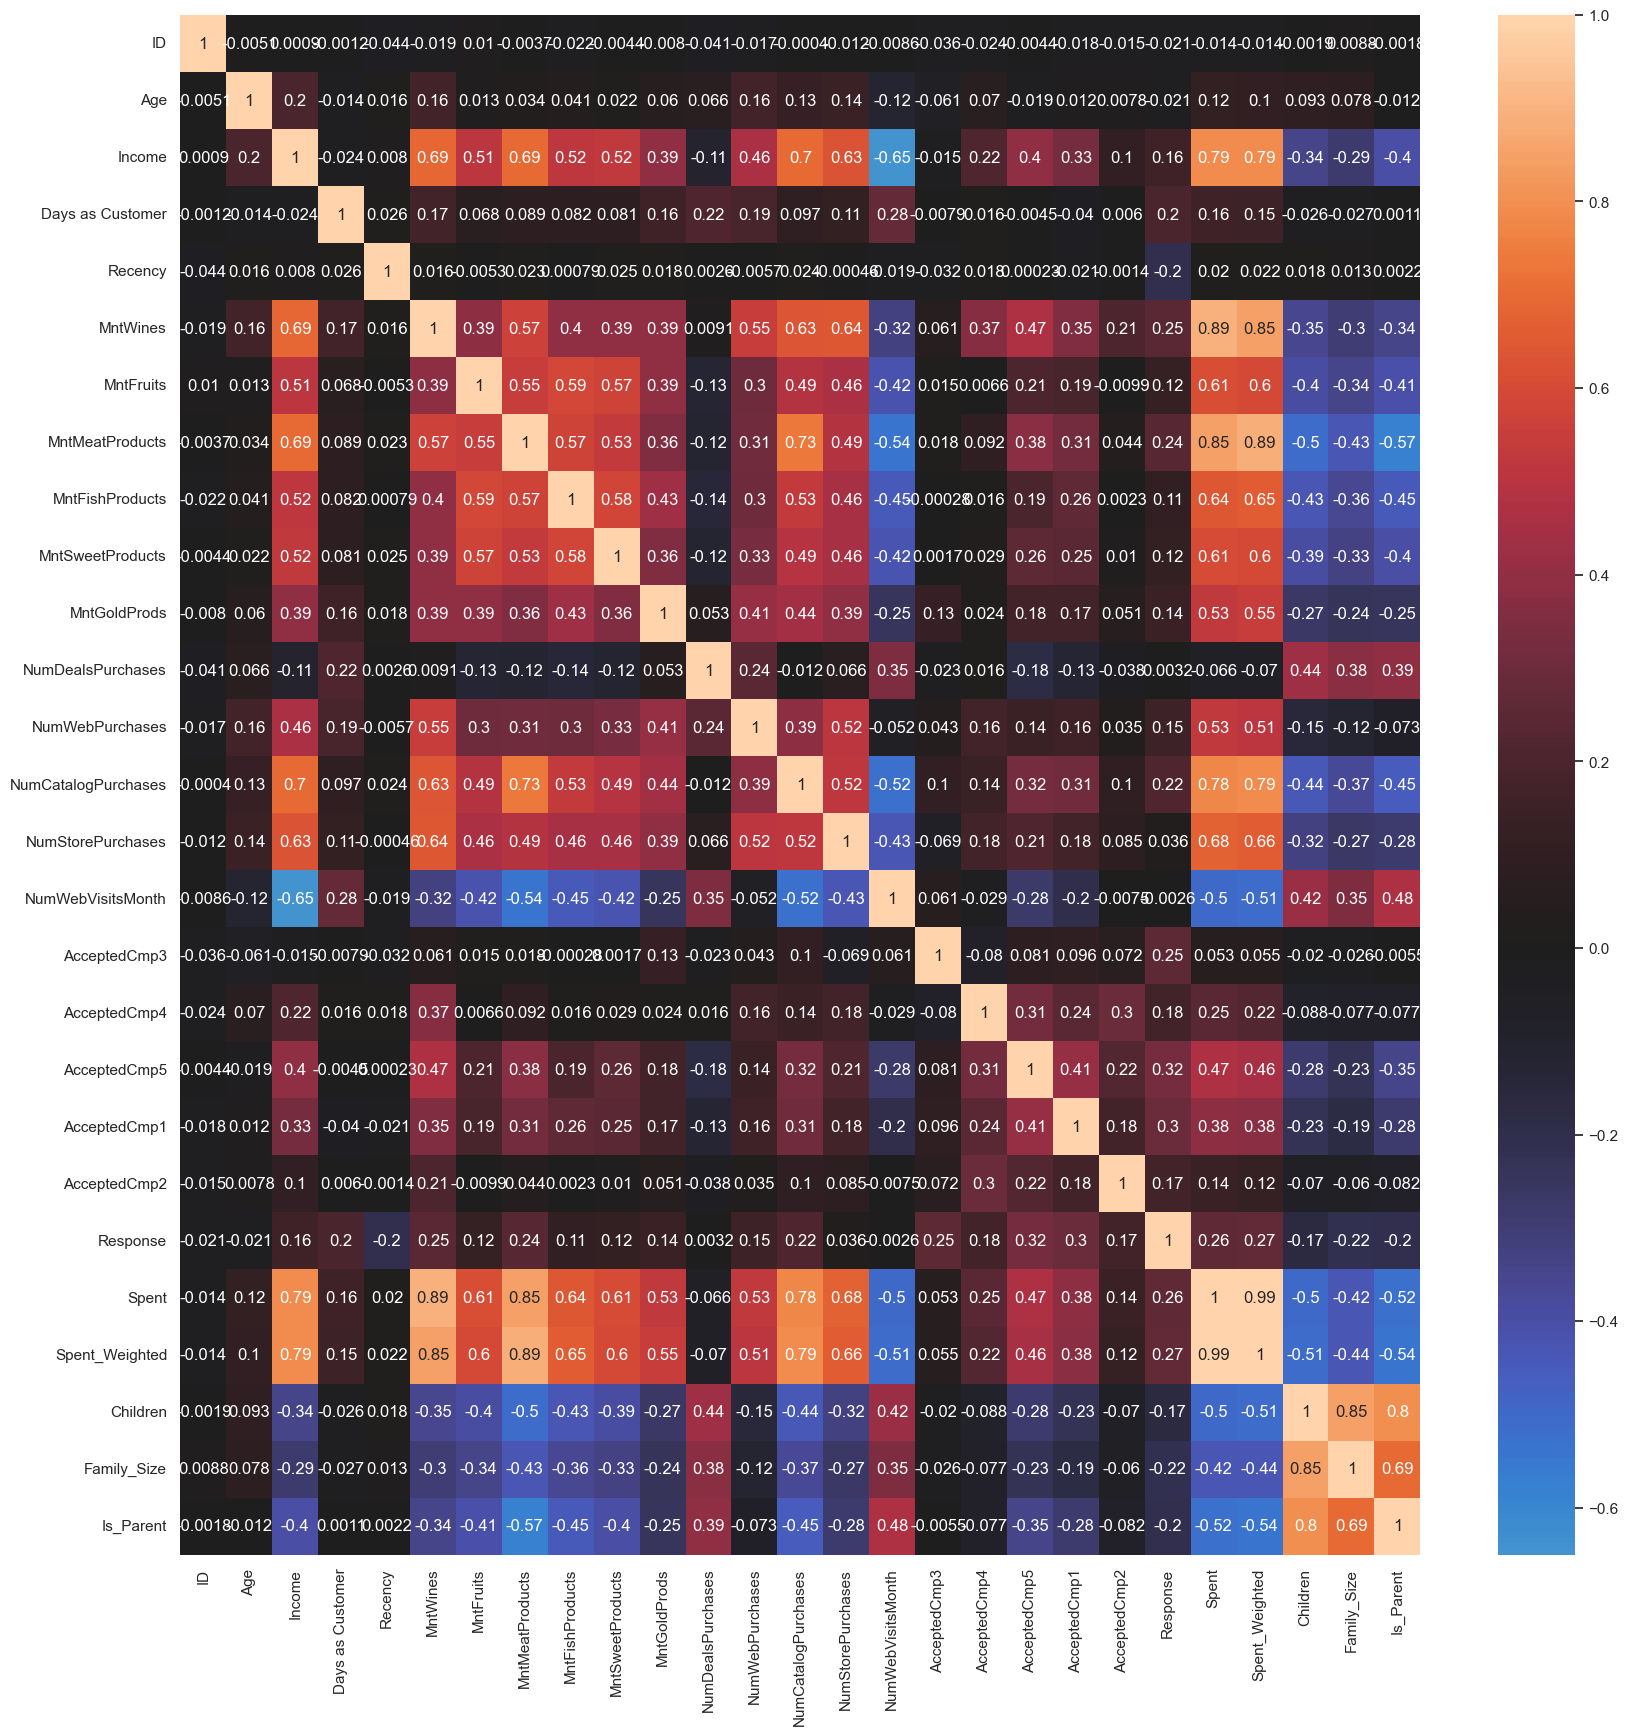

In [58]:
# Color  Setup
# cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
# correlation matrix
corrmat = df_main.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, center=0)

Correlation Table to study any observable trends between features
- Slight positive correlation of number of kids to income
- Strong Positive Correlation for amount of Wine Purchased with Amount Spent
- Strong Negative Correlation with Number of Website Visits with Individuals Income
- Positive correlation observed in the number of store purchases with income
- Negative correlation observed in the number of website visits with income

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Standardized data for r2 and slope
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_main.select_dtypes(include=["float64", "int64"])),
    columns=df_main.select_dtypes(include=["float64", "int64"]).columns
)

# Absolute data for correlation data
corr_pairs = (
    corrmat.unstack()
    .reset_index()
    .rename(columns={'level_0': 'Variable 1',
                     'level_1': 'Variable 2',
                     0: 'Correlation'})
)

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs["Variable 1"] != corr_pairs["Variable 2"]]

# Remove duplicate pairs
corr_pairs["pair"] = corr_pairs.apply(
    lambda x: "-".join(sorted([x["Variable 1"], x["Variable 2"]])),
    axis=1
    )
corr_pairs = corr_pairs.drop_duplicates(subset="pair").drop(columns="pair")

# Filter by minimum correlation if needed
corr_pairs = corr_pairs[abs(corr_pairs["Correlation"]) > 0.2].copy()

# --- Add slope and R² for each pair ---
slopes = []
r2_scores = []

for _, row in corr_pairs.iterrows():
    x = df_main[[row["Variable 1"]]].values
    y = df_main[row["Variable 2"]].values

    # Drop NaNs to avoid regression errors
    mask = ~np.isnan(x.flatten()) & ~np.isnan(y)
    x_clean = x[mask].reshape(-1, 1)
    y_clean = y[mask]

    if len(x_clean) > 1:
        model = LinearRegression()
        model.fit(x_clean, y_clean)
        slope = model.coef_[0]
        r2 = model.score(x_clean, y_clean)
    else:
        slope, r2 = np.nan, np.nan  # handle edge cases with few valid points

    slopes.append(slope)
    r2_scores.append(r2)

corr_pairs["Slope"] = slopes
corr_pairs["R²"] = r2_scores

# Sort for convenience

corr_pairs["Abs_Correlation"] = np.abs(corr_pairs["Correlation"])
corr_pairs = corr_pairs.sort_values(by="Abs_Correlation",
                                    ascending=False).reset_index(drop=True)
corr_pairs.head(10)

Variable 1      Variable 2  Correlation       Slope        R²  \
0                Spent  Spent_Weighted     0.993448    3.701346  0.986940   
1             MntWines           Spent     0.892996    1.595036  0.797442   
2      MntMeatProducts  Spent_Weighted     0.890176    8.910777  0.792412   
3             Children     Family_Size     0.849732    1.027370  0.722044   
4             MntWines  Spent_Weighted     0.848488    5.646520  0.719932   
5      MntMeatProducts           Spent     0.845543    2.271753  0.714943   
6             Children       Is_Parent     0.799802    0.482204  0.639683   
7               Income           Spent     0.792740    0.022187  0.628436   
8  NumCatalogPurchases  Spent_Weighted     0.792127  607.397203  0.627465   
9               Income  Spent_Weighted     0.788605    0.082234  0.621898   

   Abs_Correlation  
0         0.993448  
1         0.892996  
2         0.890176  
3         0.849732  
4         0.848488  
5         0.845543  
6         0.799802  
7         0.792740  
8         0.792127  
9         0.788605

### Statistical Analysis: Customer Behavior Data

Mann-Whitney Test
- First thing we try to observe is the effect of costumer being a parent on the different features
- We use the Mann-Whitney test to identify which featuers have the highest variance which we will then further investigate with a pair plot and so on
- The test shows that Grocery Items cause high variation between parents and non parent groups.
- Amount Spent and Income are also high contributing factors on the difference between parents and non parent groups

In [60]:
from scipy.stats import mannwhitneyu

print("\nRunning Mann–Whitney U (nonparametric t-test) for"
      "selected numeric features grouped by 'Is_Parent'...\n")

# Select numeric columns
all_numeric = [
    col for col in df_main
    .select_dtypes(include=["number"])
    .columns if col != "Is_Parent"
    ]
features = all_numeric[:15] + all_numeric[-4:-1]  # first 15 + last 4, remove duplicates if needed

# Ensure there are exactly 2 groups
groups_unique = df_main["Is_Parent"].dropna().unique()
if len(groups_unique) != 2:
    raise ValueError(
        f"'Is_Parent' must have exactly 2 groups;"
        f"found {len(groups_unique)}: {groups_unique}"
        )

g1, g2 = groups_unique

# Pre-group data once
group1 = df_main[df_main["Is_Parent"] == g1][features].to_numpy()
group2 = df_main[df_main["Is_Parent"] == g2][features].to_numpy()

# Run Mann–Whitney U test
test_results = []
for idx, feature in enumerate(features):
    x = group1[:, idx][~np.isnan(group1[:, idx])]
    y = group2[:, idx][~np.isnan(group2[:, idx])]
    if len(x) == 0 or len(y) == 0:
        continue
    U, p = mannwhitneyu(x, y, alternative="two-sided", method="asymptotic")
    test_results.append({"Feature": feature, "U-statistic": U, "p-value": p})

# Convert to DataFrame
test_df = (
    pd.DataFrame(test_results)
    .sort_values("U-statistic", ascending=False)
    .reset_index(drop=True)
)

# Display summary
print("\n=== Feature Differences Between Groups (Mann–Whitney U Test) ===")
print(test_df.head(10).to_string(index=False))

print("\n=== Lowest Contribution Differences (Mann–Whitney U Test) ===")
print(test_df.tail(4).to_string(index=False))

# test_df


Running Mann–Whitney U (nonparametric t-test) forselected numeric features grouped by 'Is_Parent'...


=== Feature Differences Between Groups (Mann–Whitney U Test) ===
            Feature  U-statistic       p-value
    MntMeatProducts     808047.5 1.298393e-114
     Spent_Weighted     802732.0 9.317200e-111
    MntFishProducts     797435.0 1.315530e-107
              Spent     795411.0 1.429649e-105
NumCatalogPurchases     779757.0  5.687033e-98
          MntFruits     777174.0  8.454595e-94
   MntSweetProducts     770969.5  8.288887e-90
             Income     761879.0  1.996270e-83
           MntWines     704106.0  1.771638e-51
  NumStorePurchases     689410.5  2.490549e-45

=== Lowest Contribution Differences (Mann–Whitney U Test) ===
          Feature  U-statistic       p-value
 Days as Customer     498401.0  9.483830e-01
          Recency     497980.0  9.237059e-01
NumDealsPurchases     170494.0 4.278548e-143
         Children          0.0  0.000000e+00


Pairplot Analysis  
Customer Demographic Cluster/Histogram Observation. Age has been included for observation
- More Parents have more Website Visits than Non Parents
- More Parents have less income than Non Parents
- Parents generally spend less than Non parents
- suggests parents may spend less than people who arent parents
- suggests more people who are not parents have higher income
- suggests parents spend more on wine and less on meat than people who arent parents. May be wise to look into ratios of Grocery Item to Amount Spent

Relative Plot Of Some Selected Features: A Data Subset


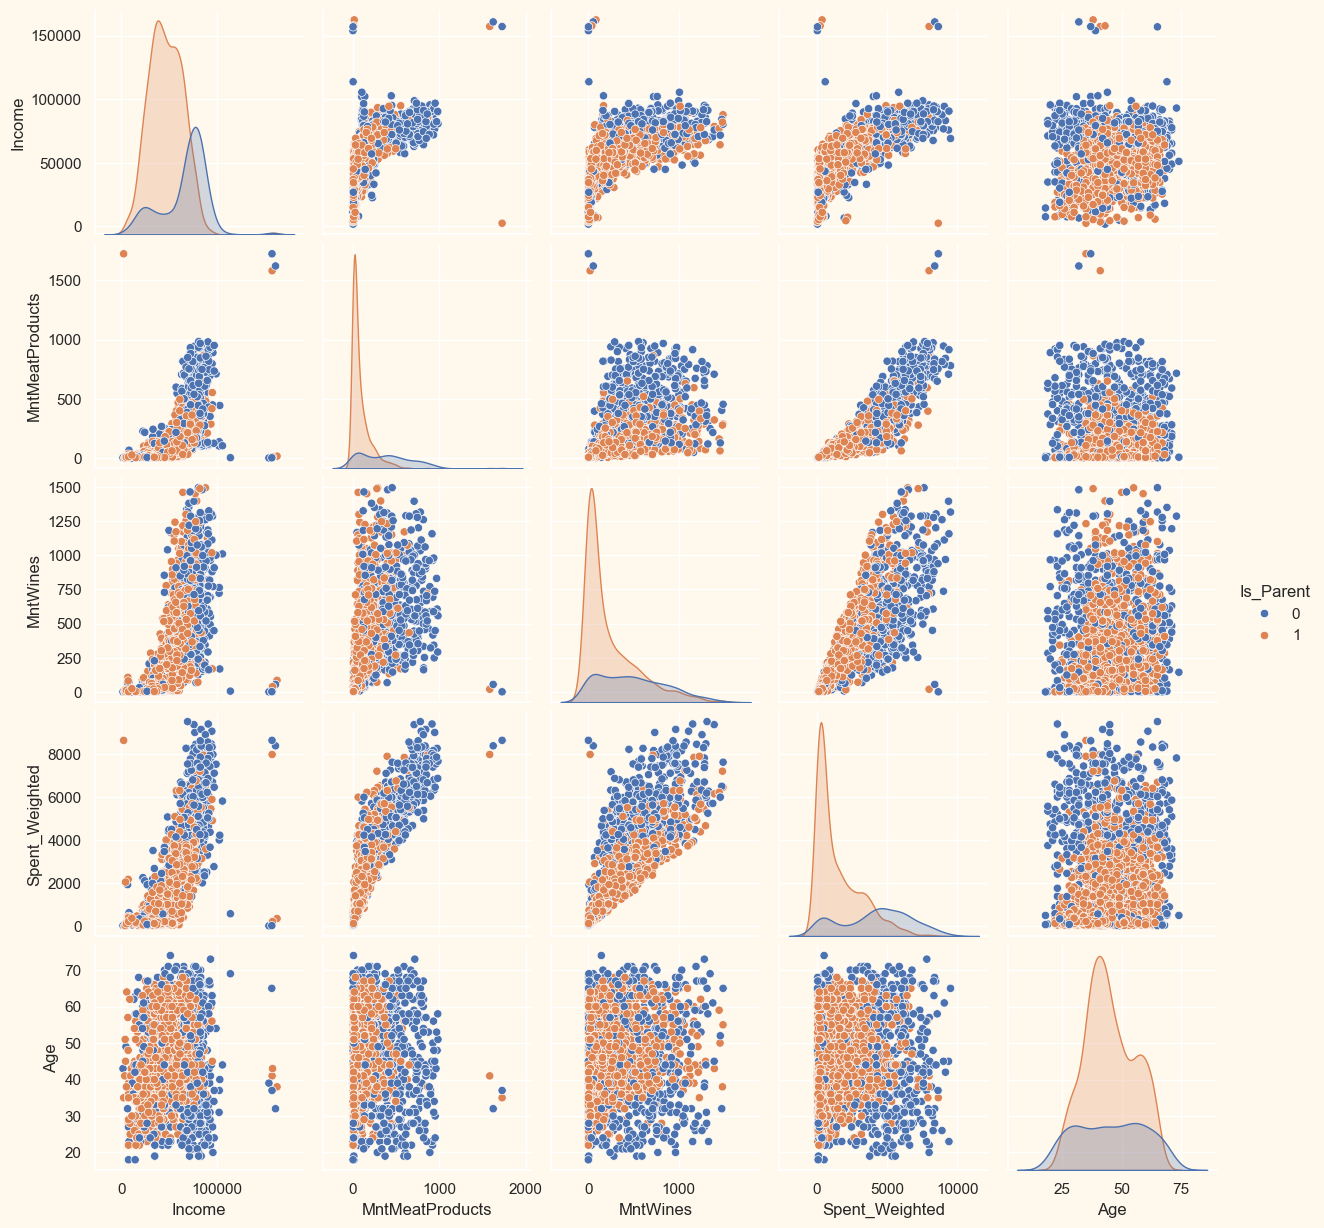

In [61]:
# Set custom background
sns.set(rc={"axes.facecolor":"#FFF9ED", "figure.facecolor":"#FFF9ED"})

# Define palette and colormap
# palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
# cmap = colors.ListedColormap(palette)

# Features to plot
To_Plot = ["Income", "MntMeatProducts", "MntWines", "Spent_Weighted", "Age"]
# To_Plot = ["Income", "MntMeatProducts","MntWines", "MntFishProducts","Spent", "Age" ]

print("Relative Plot Of Some Selected Features: A Data Subset")

# Plot
sns.pairplot(
    data=df_main,
    vars=To_Plot,
    # hue="Education",
    # hue="Relationship Status"
    hue="Is_Parent"
    # diag_kind="kde"   # optional: smooth density on diagonals
)

plt.show()


In [62]:
df_main.head()

ID  Age   Education Relationship Status   Income  Days as Customer  \
0  5524   57  Graduation               Alone  58138.0               663   
1  2174   60  Graduation               Alone  46344.0               113   
2  4141   49  Graduation           Not Alone  71613.0               312   
3  6182   30  Graduation           Not Alone  26646.0               139   
4  5324   33         PhD           Not Alone  58293.0               161   

   Recency  MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp4  \
0       58       635         88              546  ...             0   
1       38        11          1                6  ...             0   
2       26       426         49              127  ...             0   
3       26        11          4               20  ...             0   
4       94       173         43              118  ...             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Spent  Spent_Weighted  \
0             0             0             0         1   1617            6115   
1             0             0             0         0     27             110   
2             0             0             0         0    776            2700   
3             0             0             0         0     53             213   
4             0             0             0         0    422            1480   

   Children  Family_Size  Is_Parent  
0         0            1          0  
1         2            3          1  
2         0            2          0  
3         1            3          1  
4         1            3          1  

[5 rows x 29 columns]

Pairplot Analysis. Purchase Behavior
- Parents seem to have more interest in Purchase Deals than Non Parents
- Parents have higher Website Visits than non parents


Relative Plot Of Some Selected Features: A Data Subset


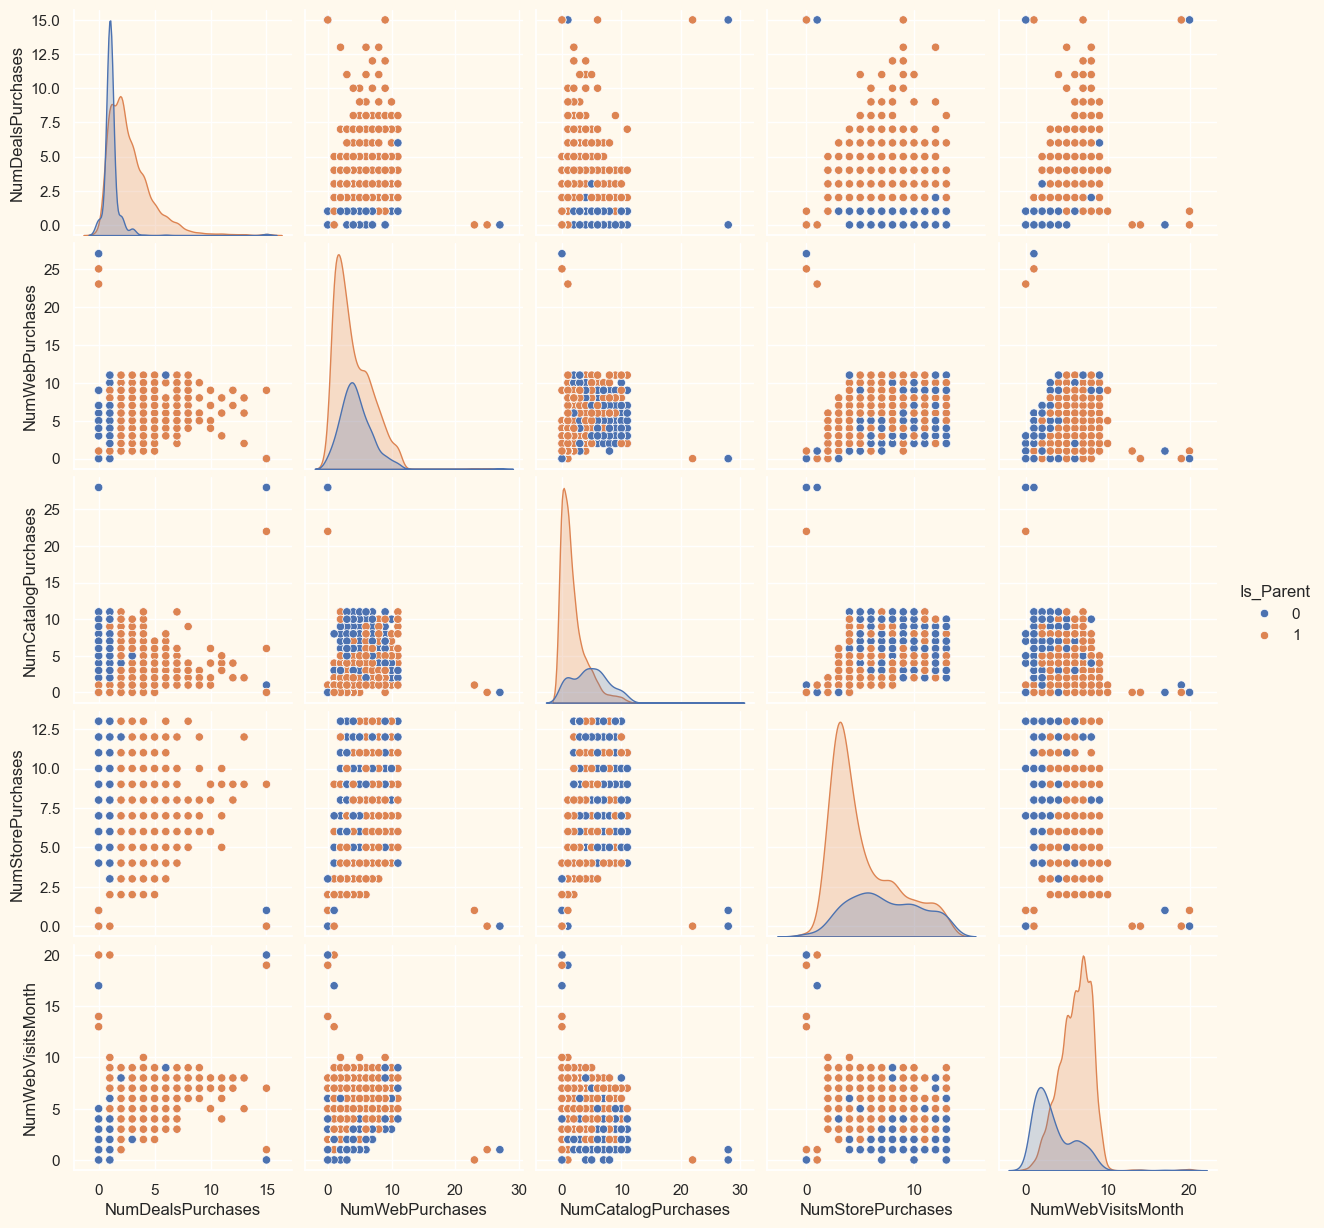

In [63]:
# Set custom background
sns.set(rc={"axes.facecolor":"#FFF9ED", "figure.facecolor":"#FFF9ED"})

# Define palette and colormap
# palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
# cmap = colors.ListedColormap(palette)

# Features to plot
To_Plot = ['NumDealsPurchases', 'NumWebPurchases',
           'NumCatalogPurchases', 'NumStorePurchases',
           'NumWebVisitsMonth']

print("Relative Plot Of Some Selected Features: A Data Subset")

# Plot
sns.pairplot(
    data=df_main,
    vars=To_Plot,
    # hue="Education",
    # hue="Relationship Status"
    hue="Is_Parent"
    # diag_kind="kde"   # optional: smooth density on diagonals
)

plt.show()


Boxplot Analysis
- Education Background
    - Basic has just graduated highschool. No Degree
    - Graduation. Has at least a Bachelor's Degree
    - 2n Cycle. In the process of Studying to get a Masters
- Observations
    - PhD Highest median income. Graduation people at 2nd. Basic education a the lowest income distribution
    - Older people are observed to have a higher income distribution than younger people. Maybe a T-test to find what age is most significant different.

In [64]:
df_sub = df_main.copy()

# Optional: define default order for consistency
edu_order = ["Basic", "Graduation", "Master", "2n Cycle", "PhD"]
df_sub["Education"] = pd.Categorical(df_sub["Education"],
                                     categories=edu_order,
                                     ordered=True)

# ---- 1. Compute median order based on Income ----
median_income = df_sub.groupby("Education")["Income"].median().sort_values()
sorted_edu_order = median_income.index.tolist()
print("Education sorted by increasing median income:", sorted_edu_order)

# ---- 2. Create subplot figure ----
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.07,
    subplot_titles=(
        "Age distribution by education level",
        "Income distribution by education level"
        )
)

# ---- 3. AGE boxplot ----
fig_age = px.box(
    df_sub,
    x="Education",
    y="Age",
    category_orders={"Education": sorted_edu_order}
)

# ---- 4. INCOME boxplot ----
fig_income = px.box(
    df_sub,
    x="Education",
    y="Income",
    category_orders={"Education": sorted_edu_order}
)

# ---- 5. Add both traces to subplot ----
for trace in fig_age.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig_income.data:
    fig.add_trace(trace, row=2, col=1)

# ---- 6. Update layout ----
fig.update_layout(
    height=800,
    showlegend=False,
    title_text="Age and Income Distribution by Education Level (Sorted by Median Income)"
)

# ---- 7. Set axis titles and ranges ----
fig.update_yaxes(title_text="Age", row=1, col=1, range=[10, 80])
fig.update_yaxes(title_text="Income", row=2, col=1, range=[0, 120000])
fig.update_xaxes(title_text="Education level", row=2, col=1)

# ---- 8. Enforce sorted education order ----
fig.update_xaxes(categoryorder="array", categoryarray=sorted_edu_order)

fig.show()

Education sorted by increasing median income: ['Basic', '2n Cycle', 'Master', 'Graduation', 'PhD']


C:\Users\Enzo\AppData\Local\Temp\ipykernel_55848\1470136748.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [65]:
# # Copy original dataframe
# df_sub = df_main.copy()

# Define 5-year bins (adjust max age to fit your dataset)
bins = range(0, df_sub["Age"].max() + 5, 5)
labels = [f"{i}-{i+4}" for i in bins[:-1]]

# Create a new column for age group
df_sub["AgeGroup"] = pd.cut(df_sub["Age"],
                            bins=bins,
                            labels=labels,
                            right=False)

# Ensure correct categorical order (ascending age)
df_sub["AgeGroup"] = pd.Categorical(df_sub["AgeGroup"],
                                    categories=labels,
                                    ordered=True)

# Calculate frequency per age group
age_counts = df_sub["AgeGroup"].value_counts().sort_index()

# Update labels to include frequency (e.g. '20–24 (n=42)')
age_labels = [f"{grp} (n={age_counts.get(grp, 0)})" for grp in labels]

# Create mapping from original label to label-with-count
label_map = dict(zip(labels, age_labels))
df_sub["AgeGroupLabel"] = df_sub["AgeGroup"].map(label_map)

# Create boxplot
fig = px.box(
    df_sub,
    x="AgeGroupLabel",
    y="Income",
    labels={"AgeGroupLabel": "Age group (5-year bins)", "Income": "Income"},
    title="Income distribution by 5-year age group",
)

# Force correct order on x-axis
fig.update_xaxes(categoryorder="array", categoryarray=age_labels)
fig.update_layout(yaxis_range=[0, 120000])  # show bins 3rd to 9th initially
fig.update_xaxes(range=[2, 15])
fig.show()

# Optionally show frequencies
print("Frequency per age group:")
print(age_counts)

Frequency per age group:
AgeGroup
0-4        0
5-9        0
10-14      0
15-19      7
20-24     54
25-29    158
30-34    200
35-39    352
40-44    380
45-49    289
50-54    213
55-59    246
60-64    207
65-69     91
70-74     15
Name: count, dtype: int64


### Statistical Analysis: Grocery Item Data

Barchart and Frequency Analysis
- Wines are the most sold item next to meat sold at almost half the amount

- Fruits, Fish, sweet prodcuts, and gold are sold the least amount of times and significantly less than Meat and Wine. Compared with each other they are sold at about the same range from each other
- We also observe the the physcial store sells almost 20% more than the online store for all grocery categories.

In [66]:
df_campaign = df_main.loc[:, ['MntWines', 'MntFruits', 'MntMeatProducts',
                              'MntFishProducts', 'MntSweetProducts',
                              'MntGoldProds']]
df_campaign.sum().sort_values(ascending=False)

MntWines            675296
MntMeatProducts     369470
MntGoldProds         97164
MntFishProducts      83279
MntSweetProducts     59827
MntFruits            58241
dtype: int64

In [67]:
# --- Error metric (customizable: std or SEM)
def error_metric(values):
    return values.std()  # or values.std() / np.sqrt(len(values)) for SEM


# --- Columns
cols = [
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]

# --- Compute totals
df_main["TotalAmount"] = df_main[cols].sum(axis=1)
df_main["TotalPurchases"] = (df_main["NumWebPurchases"] +
                             df_main["NumStorePurchases"])
denom = df_main["TotalPurchases"] + 1e-6  # avoid division by zero

# --- Split spending by channel
for col in cols:
    df_main[f"{col}_Online"] = (df_main["NumWebPurchases"]/denom) * df_main[col]
    df_main[f"{col}_Store"] = (df_main["NumStorePurchases"]/denom) * df_main[col]

online_cols = [f"{c}_Online" for c in cols]
store_cols = [f"{c}_Store" for c in cols]

# --- Melt to long format
df_online = df_main[online_cols].melt(var_name="Product", value_name="Amount")
df_online["Channel"] = "Online"
df_online["Product"] = (df_online["Product"]
                        .str
                        .replace("_Online", "", regex=False))

df_store = df_main[store_cols].melt(var_name="Product", value_name="Amount")
df_store["Channel"] = "Store"
df_store["Product"] = (df_store["Product"]
                       .str
                       .replace("_Store", "", regex=False))

df_melted = pd.concat([df_online, df_store], ignore_index=True)

# --- Summarize by channel and product
channel_summary = (
    df_melted.groupby(["Product", "Channel"])["Amount"]
    .agg(mean="mean", error=error_metric)
    .reset_index()
)

# --- Bar chart: Mean + error bars per channel
fig_channel = go.Figure()

for channel in channel_summary["Channel"].unique():
    segment = channel_summary[channel_summary["Channel"] == channel]
    fig_channel.add_trace(
        go.Bar(
            x=segment["Product"],
            y=segment["mean"],
            name=channel,
            error_y=dict(
                type="data",
                array=segment["error"]*0.25,
                visible=True,
                color="black",  # optional: make error bars clear
                thickness=1.5,
                width=4,
            ),
        )
    )

fig_channel.update_layout(
    title="Estimated Spending per Product by Channel",
    yaxis_title="Mean Amount Spent",
    xaxis_title="Product Type",
    xaxis=dict(tickangle=30),
    barmode="group",
    legend_title_text="Purchase Channel",
    template="plotly_white",
)
fig_channel.show()

# --- Overall ratios
total_online = df_main[online_cols].to_numpy().sum()
total_store = df_main[store_cols].to_numpy().sum()
total_spend = total_online + total_store

print("Overall Spending Ratios (Estimated):")
print(f"Online:  {total_online / total_spend * 100:.2f}%")
print(f"Store:   {total_store / total_spend * 100:.2f}%")

# --- Product ratios
total_per_product = df_main[cols].sum()
ratios = (total_per_product / total_per_product.sum()) * 100
print("\nRatio of total spending per product type (%):")
print(ratios.round(2))

# --- Product summary for overall spending
product_summary = (
    df_main[cols]
    .melt(var_name="Product", value_name="Amount")
    .groupby("Product")["Amount"]
    .agg(mean="mean", error=error_metric)
    .reset_index()
)

# --- Bar chart: Average spending per product

Overall Spending Ratios (Estimated):
Online:  40.83%
Store:   59.17%

Ratio of total spending per product type (%):
MntWines            50.27
MntFruits            4.34
MntMeatProducts     27.51
MntFishProducts      6.20
MntSweetProducts     4.45
MntGoldProds         7.23
dtype: float64


### Statistical Analysis: Campaign Data

In [68]:
df_main.columns

Index(['ID', 'Age', 'Education', 'Relationship Status', 'Income',
       'Days as Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Spent', 'Spent_Weighted', 'Children',
       'Family_Size', 'Is_Parent', 'TotalAmount', 'TotalPurchases',
       'MntWines_Online', 'MntWines_Store', 'MntFruits_Online',
       'MntFruits_Store', 'MntMeatProducts_Online', 'MntMeatProducts_Store',
       'MntFishProducts_Online', 'MntFishProducts_Store',
       'MntSweetProducts_Online', 'MntSweetProducts_Store',
       'MntGoldProds_Online', 'MntGoldProds_Store'],
      dtype='object')

Data Cleaning and extraction
- Individuals not affected by any campaign were not included in this analysis
- Response which is the last campaign of the year will be renamed as Campaign 6

Observations
- Based on Frequency Count the last Campaign or campaign 6 attracted the most people followed by Campaign 4, 3, and 5 which have about the same amount of accepted offers at around 160. Campaign 2 attracted significantly less people only getting 30 to people accept offers during this period.

In [69]:
# Create labeled subsets for each campaign
df_campaign0 = df_main[
    (df_main['AcceptedCmp1'] == 0) &
    (df_main['AcceptedCmp2'] == 0) &
    (df_main['AcceptedCmp3'] == 0) &
    (df_main['AcceptedCmp4'] == 0) &
    (df_main['AcceptedCmp5'] == 0) &
    (df_main['Response'] == 0)
].copy()
df_campaign0["Campaign"] = "No Campaign"

df_campaign1 = df_main[df_main['AcceptedCmp1'] == 1].copy()
df_campaign1["Campaign"] = "Campaign 1"

df_campaign2 = df_main[df_main['AcceptedCmp2'] == 1].copy()
df_campaign2["Campaign"] = "Campaign 2"

df_campaign3 = df_main[df_main['AcceptedCmp3'] == 1].copy()
df_campaign3["Campaign"] = "Campaign 3"

df_campaign4 = df_main[df_main['AcceptedCmp4'] == 1].copy()
df_campaign4["Campaign"] = "Campaign 4"

df_campaign5 = df_main[df_main['AcceptedCmp5'] == 1].copy()
df_campaign5["Campaign"] = "Campaign 5"

df_campaign6 = df_main[df_main['Response'] == 1].copy()
df_campaign6["Campaign"] = "Campaign 6"

# Combine them into one DataFrame
df_campaign_all = pd.concat([
    # df_campaign0,
    df_campaign6,
    df_campaign1,
    df_campaign2,
    df_campaign3,
    df_campaign4,
    df_campaign5],
    ignore_index=True)

# Check shape and distribution
print('No. of IDs purchased under each Campaign \n',
      df_campaign_all["Campaign"].value_counts())
print(df_campaign_all.shape)

No. of IDs purchased under each Campaign 
 Campaign
Campaign 6    333
Campaign 4    164
Campaign 3    163
Campaign 5    161
Campaign 1    142
Campaign 2     30
Name: count, dtype: int64
(993, 44)


One-way ANOVA for each feature
- Overall Difference Across all Features. We will assume the data is non-normal so we will use Kruskal-Wallis to analyse the variance across the different groups for each parameter
- Each tests whether at least one campaign group differs in the combined set of outcomes.
- Small p-values (< 0.05) mean: some features differ significantly among campaigns. High H-statistic means variance between groups are high and scale with magnitude.

Observation
- Here we rank the top 10 features that contribute the highest variance across the marketing campaigns.
- Income, MntWine (Amount Wine bought), Spent (Money Spent), rank some of the highest features that distinguish each campaign group
- In terms of purchase activity, Number of Website visits and Store Purchases also cause high variance amongst the campaign groups.
- The lowest contribution factors that add no significant variation across the different campaigns include Age, Family Size, Recency, and Number of web purchases. Its interesting to note that Number of Children and Family Size have opposing effects desping being related metrics. Low variance due to Age can also indicate that all campaigns have successfully targeted most age groups. 


In [70]:
import scipy.stats as stats

# assume df_campaign_all and features list and Campaign category are set as in your code

df_campaign_all["Campaign"] = df_campaign_all["Campaign"].astype("category")

features = ['Age', 'Income',
            'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
            'Spent', 'Spent_Weighted', 'Children', 'Family_Size']
formula = " + ".join(features) + " ~ Campaign"

anova_results = []  # we’ll call it results instead of anova_results

for feature in features:
    # Create list of arrays - one array per campaign group
    groups = [
        group_df[feature].dropna().values
        for name, group_df in df_campaign_all.groupby("Campaign")
    ]

    # Kruskal–Wallis test
    h_stat, p_val = stats.kruskal(*groups)

    anova_results.append({
        "Feature": feature,
        "H-statistic": h_stat,
        "p-value": p_val
    })

# Convert to DataFrame and sort by H-statistic descending
anova_df = (pd.DataFrame(anova_results)
            .sort_values("H-statistic", ascending=False)
            .reset_index(drop=True))

print("\n=== Feature Differences Across Campaigns (via Kruskal–Wallis) ===")
print(anova_df.head(10))

print("\n=== Lowest Contribution Differences Across Campaigns (via Kruskal–Wallis) ===")
print(anova_df.tail(5))


=== Feature Differences Across Campaigns (via Kruskal–Wallis) ===
             Feature  H-statistic       p-value
0             Income   238.423515  1.672195e-49
1           MntWines   181.394145  2.695741e-37
2              Spent   181.176869  2.999762e-37
3     Spent_Weighted   176.926396  2.425336e-36
4  NumWebVisitsMonth   165.508330  6.625509e-34
5    MntMeatProducts   159.953071  1.012883e-32
6  NumStorePurchases   152.111280  4.742999e-31
7           Children   137.009227  7.731117e-28
8   MntSweetProducts   121.392536  1.591257e-24
9  NumDealsPurchases   113.660469  6.895845e-23

=== Lowest Contribution Differences Across Campaigns (via Kruskal–Wallis) ===
            Feature  H-statistic       p-value
13      Family_Size    60.761023  8.461144e-12
14          Recency    47.006635  5.663799e-09
15  NumWebPurchases    31.987283  5.975809e-06
16     MntGoldProds    30.312277  1.280131e-05
17              Age    18.708556  2.177742e-03


C:\Users\Enzo\AppData\Local\Temp\ipykernel_55848\4293159426.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Pairplot Analysis
- Plotting Top 5 and Top 10 features with the highest variation across features for each campaign
- Initial Analysis to observe any unique group behaviors between marketing campaigns

Observations
- We first easily observe clear distinction between campaign 3 (green) and campaign 5 (purple). Also consistent with all feature pairs is campaign 6 capturing the entire feature space as observed from the histograms 
- Here we also continue to observe an increase in the amount of wine spent with increasing income and a decrease in
- Difficult to draw initial conclusion for store and online purchase behavior. Boxplot analysis will be used to look deeper

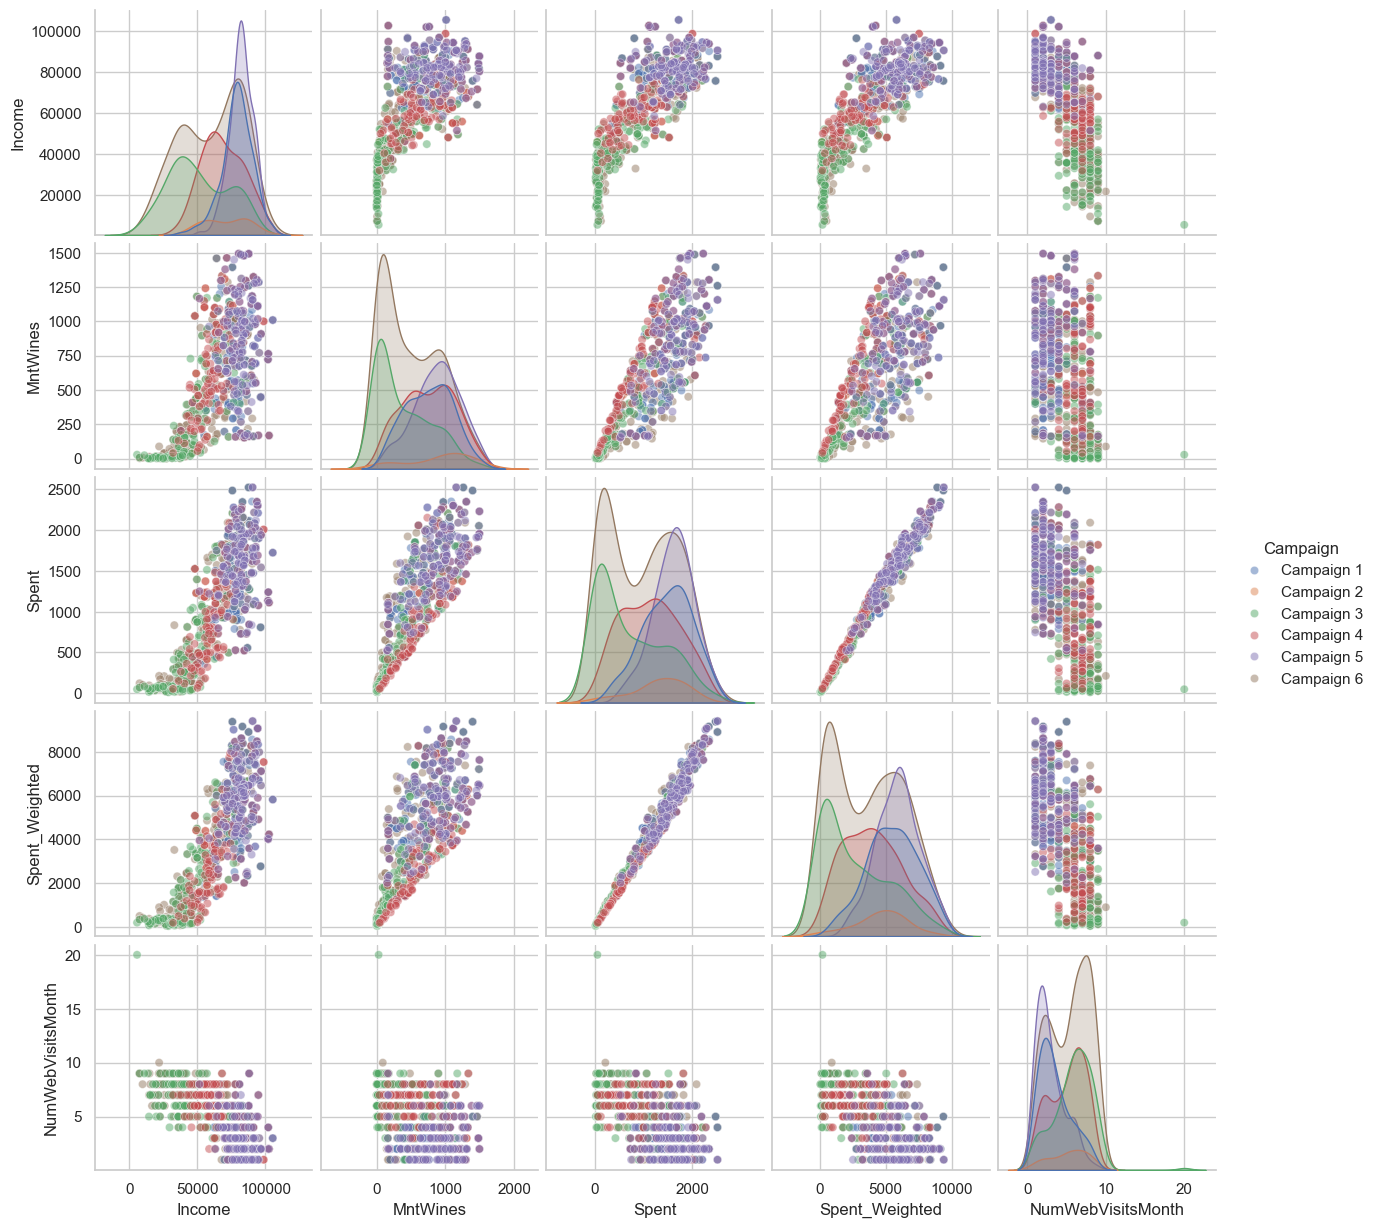

In [71]:
sns.set(style="whitegrid")

cols_to_plot = ["Income", "MntMeatProducts", "MntWines",
                "Spent", "Age", "NumWebVisitsMonth",
                "NumStorePurchases"]
cols_to_plot = ["Income", "MntMeatProducts", "MntSweets",
                "Spent", "Age", "NumWebVisitsMonth",
                "NumStorePurchases"]

cols_to_plot = anova_df["Feature"].iloc[:5]
# cols_to_plot = anova_df["Feature"].iloc[5:10]
sns.pairplot(
    df_campaign_all,
    vars=cols_to_plot,
    hue="Campaign",
    diag_kind="kde",
    plot_kws={"alpha": 0.5}
)

plt.show()

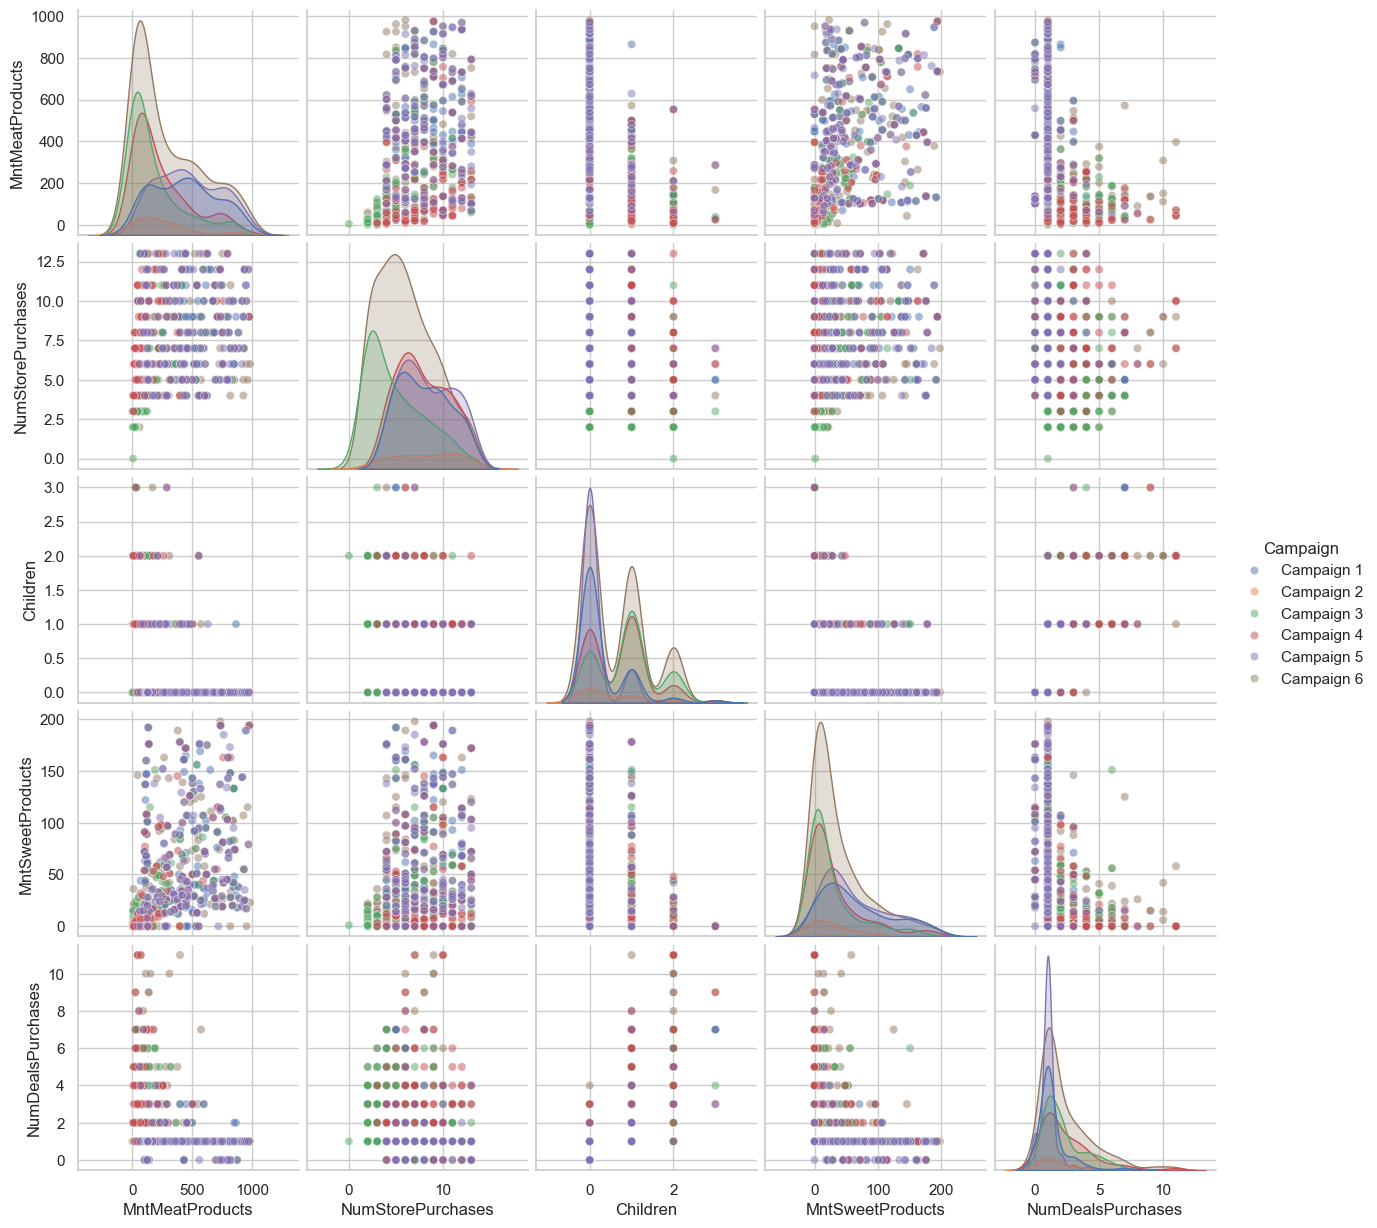

In [72]:
sns.set(style="whitegrid")

cols_to_plot = ["Income", "MntMeatProducts", "MntWines",
                "Spent", "Age", "NumWebVisitsMonth",
                "NumStorePurchases"]
cols_to_plot = anova_df["Feature"].iloc[5:10]
sns.pairplot(
    df_campaign_all,
    vars=cols_to_plot,
    hue="Campaign",
    diag_kind="kde",
    plot_kws={"alpha": 0.5}
)

plt.show()

Boxplot Analysis: Top Distinguishing Features
- Looking at Income, we first observe Campaign 1 and Campaign 5 attracting most of the high income earners at around $82k median. Campaign 3 attracts a lower income range of $47K median. Campaing 2 and Campaign 4 perform at middle. Campaign 6 targets the largest distribution of income with median of $64K.
- Looking at Amount of Wine Spent, we see Campaign 5 and Campaign 2 selling the highest volumes of wine with median of 900 to 1000 bottles. Campaign 3 saw the lowest amount of wine sold at around 179 bottles. 
- In terms of amount spent, we see a trend similar to the Income level with Campaign 5 selling the highest median volume of 1658 per individual. The trend is also the same for spent-weighted indicating the value of products may not have an effect on the purchase behavior of the customers for each campaign.
- In Website visits, we see campaign 3 attracting the highest traffic with median visit per inddividual of 6 per month. Campaign 5 sees the lowest number and campaign 6 having the widest distribution.
- All other grocery items such as Meat and Sweets see similar trend to the amount spent per customer. Campaign 5 with the highest median and campaign 3 with the lowest.
- For store purchases we see Campaigns 1,2,4, and 5 perform similarly with a median 8 per customer. Campaign 3 sees the lowest store purchases with median of 4 visits 


In [73]:
# Columns to plot
# cols_to_plot = ["Income", "MntMeatProducts", "MntWines", "Spent", "Age", "NumWebVisitsMonth", "NumStorePurchases"]
cols_to_plot = anova_df["Feature"].iloc[:10]
# Grid layout (adjust columns per row)
n_cols = 3
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

# Create subplots
fig = make_subplots(
    rows=n_rows, cols=n_cols,
    subplot_titles=cols_to_plot,
    horizontal_spacing=0.08,
    vertical_spacing=0.1
)

# Custom color palette
palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
campaigns = df_campaign_all["Campaign"].unique()

# Add one boxplot per feature per campaign
for i, feature in enumerate(cols_to_plot):
    row = i // n_cols + 1
    col = i % n_cols + 1

    for j, campaign in enumerate(campaigns):
        df_subset = df_campaign_all[df_campaign_all["Campaign"] == campaign]
        fig.add_trace(
            go.Box(
                y=df_subset[feature],
                name=campaign,
                # boxmean='sd',        # shows mean and standard deviation
                marker_color=palette[j % len(palette)],
                line=dict(width=1),
                opacity=0.8
            ),
            row=row, col=col
        )

    # Set layout for each subplot
    fig.update_yaxes(title_text=feature, row=row, col=col)

# Layout and aesthetics
fig.update_layout(
    height=n_rows * 350,
    width=1200,
    title_text="Feature Distributions by Campaign",
    showlegend=False,
    template="plotly_white"
)

fig.show()

Boxplot Analysis: Bottom Distinguishing Features
- Based on our Kruskal Wallis Analysis, we observe the features that cause a lesser but still significant difference amongst the different marketing campaigns
- Age has the least amount of variation amongst all the features, this can indicate that every marketing campaign has taregt the same range of ages with most of them around 40 to 43 years old.
- Recency or the last purchase of a customer also shows no difference across the campaigns with the exception of campaign 6 which seems to have attracted a lot of recent customers of around 30 days compared to the other campaigns that attract around 50 day recent customers
- The amount of fruits and gold purchased also show no significant difference across each campaign
- Number of webpurchases and family size also stays relatively the same across campaigns with medians of 5 online purchases and 2 children respectively

In [74]:
# Columns to plot
# cols_to_plot = ["Income", "MntMeatProducts", "MntWines", "Spent", "Age", "NumWebVisitsMonth", "NumStorePurchases"]
cols_to_plot = anova_df["Feature"].iloc[12:].tolist()
# or: cols_to_plot = anova_df["Feature"].iloc[12:17].reset_index(drop=True)

fig = make_subplots(
    rows=n_rows-2,
    cols=n_cols,
    subplot_titles=cols_to_plot,
    horizontal_spacing=0.08,
    vertical_spacing=0.1,
)

# Custom color palette
palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
campaigns = df_campaign_all["Campaign"].unique()

# Add one boxplot per feature per campaign
for i, feature in enumerate(cols_to_plot):
    row = i // n_cols + 1
    col = i % n_cols + 1

    for j, campaign in enumerate(campaigns):
        df_subset = df_campaign_all[df_campaign_all["Campaign"] == campaign]
        fig.add_trace(
            go.Box(
                y=df_subset[feature],
                name=campaign,
                # boxmean='sd',        # shows mean and standard deviation
                marker_color=palette[j % len(palette)],
                line=dict(width=1),
                opacity=0.8
            ),
            row=row, col=col
        )

    # Set layout for each subplot
    fig.update_yaxes(title_text=feature, row=row, col=col)

# Layout and aesthetics
fig.update_layout(
    height=n_rows * 250,
    width=1200,
    title_text="Feature Distributions by Campaign",
    showlegend=False,
    template="plotly_white"
)

fig.show()

One-way ANOVA for each Marketing Campaign
- Which specific feature differ
- Univariate ANOVA
- Campaign 3 and 5 have then highest opposing difference among the marketing campaingns

In [75]:
df_main.columns

Index(['ID', 'Age', 'Education', 'Relationship Status', 'Income',
       'Days as Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Spent', 'Spent_Weighted', 'Children',
       'Family_Size', 'Is_Parent', 'TotalAmount', 'TotalPurchases',
       'MntWines_Online', 'MntWines_Store', 'MntFruits_Online',
       'MntFruits_Store', 'MntMeatProducts_Online', 'MntMeatProducts_Store',
       'MntFishProducts_Online', 'MntFishProducts_Store',
       'MntSweetProducts_Online', 'MntSweetProducts_Store',
       'MntGoldProds_Online', 'MntGoldProds_Store'],
      dtype='object')

In [76]:
import itertools
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind

features = ["Income", "Spent", "MntWines", "MntMeatProducts",
            "Age", "NumWebVisitsMonth", "NumStorePurchases"]
features = anova_df["Feature"].iloc[:10]

campaigns = df_campaign_all["Campaign"].unique()
pairs = list(itertools.combinations(campaigns, 2))

results = []

for feat in features:
    for g1, g2 in pairs:
        x1 = df_campaign_all.loc[df_campaign_all["Campaign"] == g1, feat].dropna()
        x2 = df_campaign_all.loc[df_campaign_all["Campaign"] == g2, feat].dropna()

        if len(x1) > 1 and len(x2) > 1:
            t_stat, p_val, df = ttest_ind(x1, x2, usevar='unequal')  # Welch t-test
            results.append({
                "Feature": feat,
                "Group1": g1,
                "Group2": g2,
                "t_stat": t_stat,
                "p_value": p_val
            })

ttest_df = pd.DataFrame(results)
ttest_df["Significant"] = ttest_df["p_value"] < 0.05
ttest_df.sort_values(["Feature", "p_value"], inplace=True)

print(ttest_df.head(5))

# Count how many times each campaign appears in a significant comparison
sig_counts = (
    pd.concat([
        ttest_df.loc[ttest_df["Significant"], "Group1"],
        ttest_df.loc[ttest_df["Significant"], "Group2"]
    ])
    .value_counts()
    .rename_axis("Campaign")
    .reset_index(name="Significant_Count")
)

print("\n=== Significant Difference Counts per Campaign ===")
print(sig_counts)

      Feature      Group1      Group2     t_stat       p_value  Significant
118  Children  Campaign 3  Campaign 5  10.677462  1.270000e-22         True
109  Children  Campaign 6  Campaign 5   8.359294  7.810310e-16         True
111  Children  Campaign 1  Campaign 3  -8.217557  6.133315e-15         True
119  Children  Campaign 4  Campaign 5   8.025093  2.532367e-14         True
112  Children  Campaign 1  Campaign 4  -5.803054  1.635542e-08         True

=== Significant Difference Counts per Campaign ===
     Campaign  Significant_Count
0  Campaign 3                 43
1  Campaign 5                 43
2  Campaign 6                 40
3  Campaign 1                 39
4  Campaign 4                 31
5  Campaign 2                 26


### Conclusion

The customer personality analysis reveal the difference between deomgraphic groups and how they interact with the market. We observed tha parents usually have lower income, spend less, but engage more with online shopping and promotional offers. Non parents tend to have higher income, spend more on average, have a preference for purchasing product in the physical stores. With income mostly dictating the purchase behavior, education and age play a role in income of each customer. Higher education and older ages tend to have higher income. This relationship suggests that wealthier customers contribute the most to sale, while the negative correlation between income and website visits show that online engagement is stronger among lower income customers.

Looking at grocery items, we found that wine and meat are the most purchased products, while items like fruits, fish, sweets, and gold are bought significantly lesser. Physical stores outperform online channels by around twenty percent across all categories, which suggests people still prefer to visit physical stores, especially to purchase items like wine. When reviewing the campaign data, Campaign 6 had the widest reach, Campaign 5 was most effective in attracting high-income customers, and Campaign 3 attracted the lower-income but more digitally active individuals.

Overall, our group sees a strong connection between the three areas of analysis—customer behavior, grocery items, and campaign performance. Each area complements the other by showing how demographics and purchasing habits influence campaign effectiveness. Customers’ income levels and family status affect both what they buy and how they respond to marketing efforts. For example, high-income, store-focused customers align with campaigns promoting premium products, while parents who are more price-conscious engage better with online promotions and discounts. These relationships highlight the importance of targeted marketing strategies that align product types, promotional channels, and customer demographics to improve both engagement and profitability.


### Recommendations

Although the customer personality analysis done provided a significant amount of information regarding the relationships between customer profile, product purchases, marketing campaign participation, and purchasing channels used, there were still gaps to the analysis done, which could have been addressed if only there were more information. Information such as the price of the products as well as more details about the marketing campaigns could have enriched the analysis done even further had these been available in the dataset used. With that said, it is recommended that future customer personality analyses conducted include data such as those that were mentioned to improve the quality of these analyses.

### References

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis  
https://haas.berkeley.edu/faculty/romerohernandez-omar/